In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
pd.set_option('display.max_columns', None)

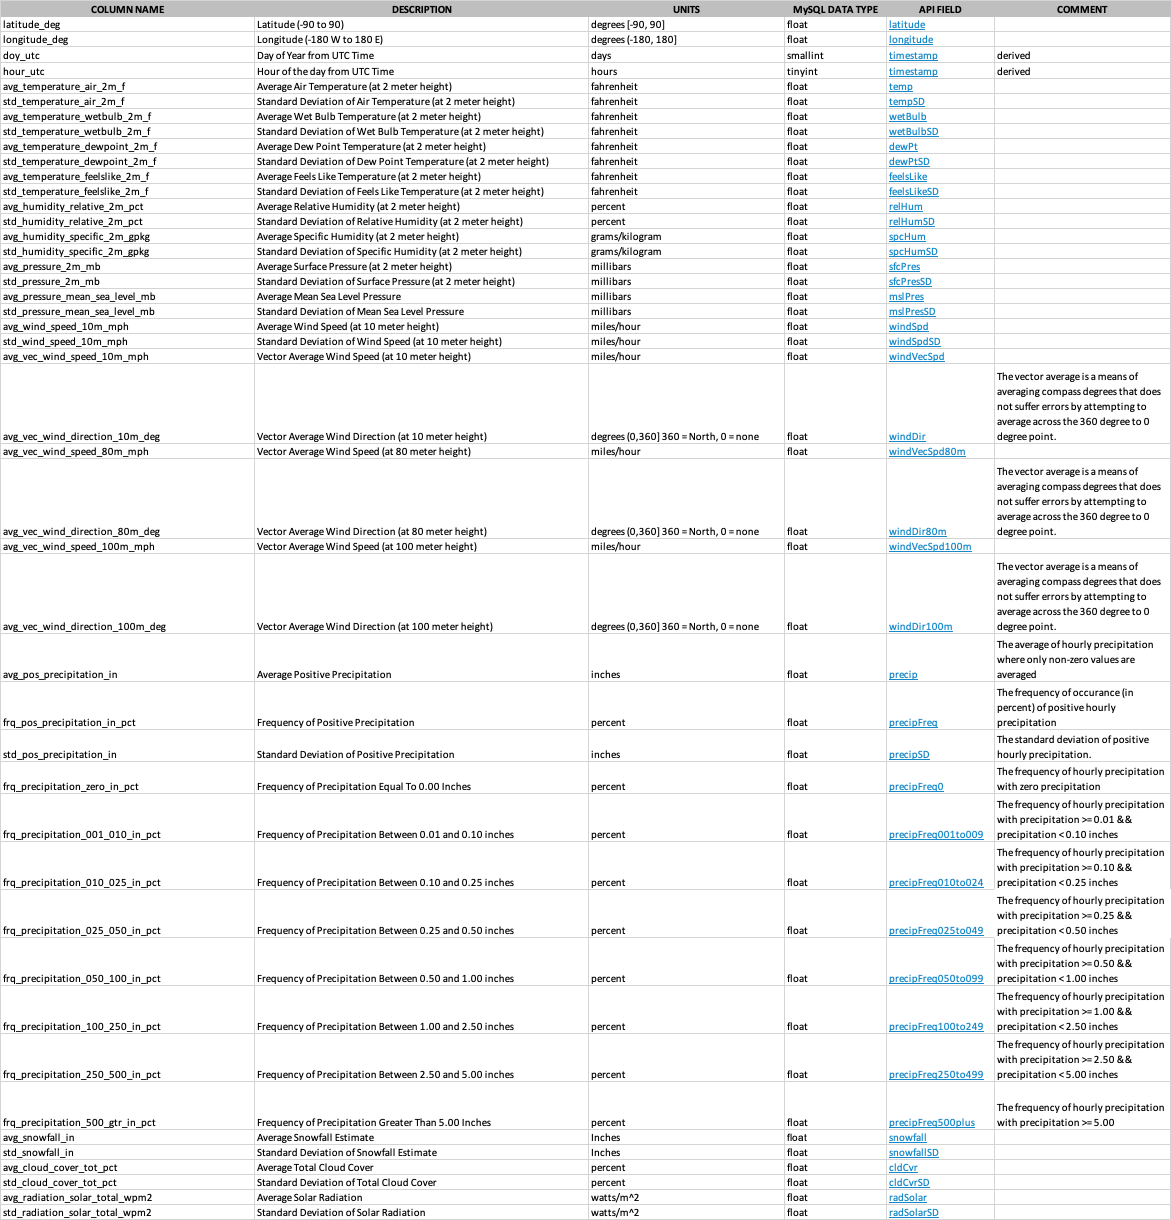

In [2]:
climate = pd.read_csv('csv-files/history-latlon-hour-global-20110101-20200510.csv')

In [3]:
climate.shape

(82031, 28)

In [4]:
climate.columns

Index(['latitude_deg', 'longitude_deg', 'time_valid_utc', 'doy_utc',
       'hour_utc', 'time_valid_lcl', 'dst_offset_minutes',
       'temperature_air_2m_f', 'temperature_wetbulb_2m_f',
       'temperature_dewpoint_2m_f', 'temperature_feelslike_2m_f',
       'temperature_windchill_2m_f', 'temperature_heatindex_2m_f',
       'humidity_relative_2m_pct', 'humidity_specific_2m_gpkg',
       'pressure_2m_mb', 'pressure_tendency_2m_mb',
       'pressure_mean_sea_level_mb', 'wind_speed_10m_mph',
       'wind_direction_10m_deg', 'wind_speed_80m_mph',
       'wind_direction_80m_deg', 'wind_speed_100m_mph',
       'wind_direction_100m_deg', 'precipitation_in', 'snowfall_in',
       'cloud_cover_pct', 'radiation_solar_total_wpm2'],
      dtype='object')

In [5]:
climate.head()

,latitude_deg,longitude_deg,time_valid_utc,doy_utc,hour_utc,time_valid_lcl,dst_offset_minutes,temperature_air_2m_f,temperature_wetbulb_2m_f,temperature_dewpoint_2m_f,temperature_feelslike_2m_f,temperature_windchill_2m_f,temperature_heatindex_2m_f,humidity_relative_2m_pct,humidity_specific_2m_gpkg,pressure_2m_mb,pressure_tendency_2m_mb,pressure_mean_sea_level_mb,wind_speed_10m_mph,wind_direction_10m_deg,wind_speed_80m_mph,wind_direction_80m_deg,wind_speed_100m_mph,wind_direction_100m_deg,precipitation_in,snowfall_in,cloud_cover_pct,radiation_solar_total_wpm2
0,51.521,-0.2135,1/1/2011 0:00,1,0,1/1/2011 0:00,0,39.4,38.9,38.3,35.6,35.6,39.4,95.9,4.8,1017.7,-0.1,1025.7,5.3,286.0,7.4,289.1,7.7,289.8,0.0,0.0,99,0.0
1,51.521,-0.2135,1/1/2011 1:00,1,1,1/1/2011 1:00,0,40.3,39.7,38.9,36.1,36.1,40.3,94.7,4.9,1017.3,-0.4,1025.4,6.0,292.9,9.1,296.0,9.5,296.6,0.0,0.0,99,0.0
2,51.521,-0.2135,1/1/2011 2:00,1,2,1/1/2011 2:00,0,40.1,39.3,38.5,35.3,35.3,40.1,94.0,4.8,1016.7,-0.6,1024.8,7.0,285.4,10.4,289.0,10.9,290.0,0.0,0.0,98,0.0
3,51.521,-0.2135,1/1/2011 3:00,1,3,1/1/2011 3:00,0,39.8,39.0,38.0,34.3,34.3,39.8,93.5,4.8,1016.5,-0.3,1024.5,8.2,283.8,12.0,287.2,12.5,287.8,0.0,0.0,97,0.0
4,51.521,-0.2135,1/1/2011 4:00,1,4,1/1/2011 4:00,0,39.7,38.8,37.7,33.7,33.7,39.7,92.8,4.7,1016.6,0.2,1024.6,9.0,286.4,13.1,290.1,13.7,290.7,0.0,0.0,97,0.0


In [6]:
mapper = {}
new_cols = ['latitude','longitude','date_utc','doy_utc','hour_utc','time_valid_lcl','offset_min','temp','wetBulb',
'dewPt','feelsLike','windchill','heatind','relHum','specHum',
'Pres','Pres_tndncy','mslPres','windSpd10m','windDir10m',
 'windSpd80m','windDir80m','windSpd100m','windDir100m',
 'precip','snowfall','cldCvr','radSolar']

In [7]:
len(climate.columns),len(new_cols)    

(28, 28)

In [8]:
for old,new in list(zip(climate.columns,new_cols)):#shorthand way of changing column names
    mapper[old] = new
climate.rename(mapper,axis=1,inplace=True)    

In [9]:
climate.isnull().sum()#a few null values.

latitude           0
longitude          0
date_utc           0
doy_utc            0
hour_utc           0
time_valid_lcl     0
offset_min         0
temp               0
wetBulb            5
dewPt              5
feelsLike          0
windchill          0
heatind            0
relHum             5
specHum            0
Pres               5
Pres_tndncy       11
mslPres            0
windSpd10m         0
windDir10m         0
windSpd80m        17
windDir80m         0
windSpd100m       17
windDir100m        0
precip             8
snowfall           0
cldCvr             0
radSolar          21
dtype: int64

#### Replacing NaN values with previous value

In [10]:
climate.fillna(method='ffill',inplace=True)

In [11]:
climate.isnull().sum()

latitude          0
longitude         0
date_utc          0
doy_utc           0
hour_utc          0
time_valid_lcl    0
offset_min        0
temp              0
wetBulb           0
dewPt             0
feelsLike         0
windchill         0
heatind           0
relHum            0
specHum           0
Pres              0
Pres_tndncy       0
mslPres           0
windSpd10m        0
windDir10m        0
windSpd80m        0
windDir80m        0
windSpd100m       0
windDir100m       0
precip            0
snowfall          0
cldCvr            0
radSolar          0
dtype: int64

In [12]:
climate.hour_utc = pd.to_timedelta(climate.hour_utc,unit='h')
#climate[climate.date_utc != climate.time_valid_lcl]#local time is an hour ahead of universal time here.

In [13]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82031 entries, 0 to 82030
Data columns (total 28 columns):
latitude          82031 non-null float64
longitude         82031 non-null float64
date_utc          82031 non-null object
doy_utc           82031 non-null int64
hour_utc          82031 non-null timedelta64[ns]
time_valid_lcl    82031 non-null object
offset_min        82031 non-null int64
temp              82031 non-null float64
wetBulb           82031 non-null float64
dewPt             82031 non-null float64
feelsLike         82031 non-null float64
windchill         82031 non-null float64
heatind           82031 non-null float64
relHum            82031 non-null float64
specHum           82031 non-null float64
Pres              82031 non-null float64
Pres_tndncy       82031 non-null float64
mslPres           82031 non-null float64
windSpd10m        82031 non-null float64
windDir10m        82031 non-null float64
windSpd80m        82031 non-null float64
windDir80m        82031 non-

Now we need to convert farenheit to degrees celcius.

In [14]:
def to_celcius(farenheit):
    return 5*(farenheit-32)/9

In [15]:
climate.temp = climate.temp.map(to_celcius)
climate.wetBulb = climate.wetBulb.map(to_celcius)
climate.feelsLike = climate.feelsLike.map(to_celcius)
climate.dewPt = climate.dewPt.map(to_celcius)
climate.windchill = climate.windchill.map(to_celcius)
climate.heatind = climate.heatind.map(to_celcius)

In [16]:
climate.date_utc = pd.DatetimeIndex(climate.date_utc)

In [17]:
(climate.date_utc < datetime.date(2020,5,9)).sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


81984

In [18]:
climate_sub = climate[climate.date_utc < datetime.date(2020,5,2)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [19]:
climate_sub.shape

(81816, 28)

In [20]:
climate_sub.head()

,latitude,longitude,date_utc,doy_utc,hour_utc,time_valid_lcl,offset_min,temp,wetBulb,dewPt,feelsLike,windchill,heatind,relHum,specHum,Pres,Pres_tndncy,mslPres,windSpd10m,windDir10m,windSpd80m,windDir80m,windSpd100m,windDir100m,precip,snowfall,cldCvr,radSolar
0,51.521,-0.2135,2011-01-01 00:00:00,1,00:00:00,1/1/2011 0:00,0,4.111111,3.833333,3.500000,2.000000,2.000000,4.111111,95.9,4.8,1017.7,-0.1,1025.7,5.3,286.0,7.4,289.1,7.7,289.8,0.0,0.0,99,0.0
1,51.521,-0.2135,2011-01-01 01:00:00,1,01:00:00,1/1/2011 1:00,0,4.611111,4.277778,3.833333,2.277778,2.277778,4.611111,94.7,4.9,1017.3,-0.4,1025.4,6.0,292.9,9.1,296.0,9.5,296.6,0.0,0.0,99,0.0
2,51.521,-0.2135,2011-01-01 02:00:00,1,02:00:00,1/1/2011 2:00,0,4.500000,4.055556,3.611111,1.833333,1.833333,4.500000,94.0,4.8,1016.7,-0.6,1024.8,7.0,285.4,10.4,289.0,10.9,290.0,0.0,0.0,98,0.0
3,51.521,-0.2135,2011-01-01 03:00:00,1,03:00:00,1/1/2011 3:00,0,4.333333,3.888889,3.333333,1.277778,1.277778,4.333333,93.5,4.8,1016.5,-0.3,1024.5,8.2,283.8,12.0,287.2,12.5,287.8,0.0,0.0,97,0.0
4,51.521,-0.2135,2011-01-01 04:00:00,1,04:00:00,1/1/2011 4:00,0,4.277778,3.777778,3.166667,0.944444,0.944444,4.277778,92.8,4.7,1016.6,0.2,1024.6,9.0,286.4,13.1,290.1,13.7,290.7,0.0,0.0,97,0.0


In [21]:
climate.offset_min.value_counts()

-60    47230
 0     34801
Name: offset_min, dtype: int64

In [22]:
##exporting climate_sub as a dataframe
climate_sub.to_csv('csv-files/climate.csv',index=False)